# Lab 3.02 - The Central Limit Theorem



In [4]:
# Package Imports# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
# name 'norm' is not defined
from scipy.stats import norm                       # Normal distribution

## Exercise 1 - Cholesterol 

A health survey between 1988 and 1994 indicated that the mean cholesterol value for women between the age of 20 and 29 was 183 mg/dl, with a standard deviation equal to 36. We now take a random sample of 81 women.

1. Plot the probability distribution of the sample mean $\overline{x}$.
2. What is the probability of the sample mean being $\overline{x} < 185$? (Answer ≈ 69,1%)
3. What is the probability of $175 < \overline{x} < 185$ (Answer ≈ 66,9%)
4. What is the probability of $\overline{x} > 190$ (Answer ≈ 4,0%)

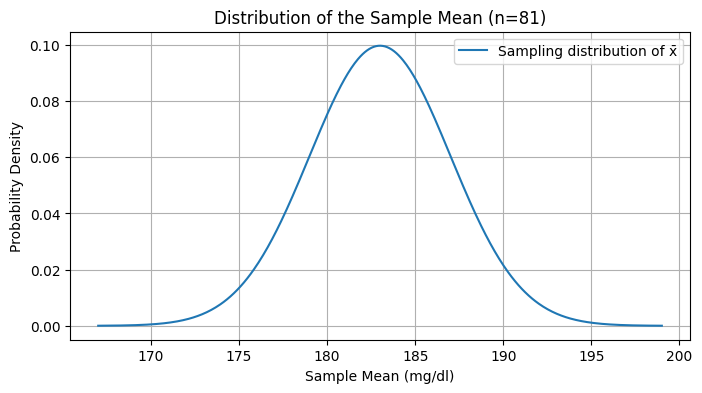

Probability of sample mean being less than 185 mg/dl: 69.1%
Probability of sample mean being between 175 and 185: 66.9%
Probability of sample mean being less than 185 mg/dl: 4.0%


In [19]:
# 1. 
mu = 183
sigma = 36
n = 81

# Sampling distribution parameters
sigma_xbar = sigma / np.sqrt(n)

# x-values for plotting
x = np.linspace(mu - 4*sigma_xbar, mu + 4*sigma_xbar, 500)
y = norm.pdf(x, mu, sigma_xbar)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Sampling distribution of x̄')
plt.title('Distribution of the Sample Mean (n=81)')
plt.xlabel('Sample Mean (mg/dl)')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()
# 2 What is the probability of the sample mean being $\overline{x} < 185 in percent
p = stats.norm.cdf(185, loc=mu, scale=sigma_xbar)
print(f"Probability of sample mean being less than 185 mg/dl: {p * 100:.1f}%")

# 3
s = stats.norm.cdf(185, loc=mu, scale=sigma_xbar) - stats.norm.cdf(175, loc=mu, scale=sigma_xbar)
print(f"Probability of sample mean being between 175 and 185: {s * 100:.1f}%")

# 4 # What is the probability of the sample mean being $\overline{x} > 190 in percent

k = 1 - stats.norm.cdf(190, loc=mu, scale=sigma_xbar)

# k = stats.norm.sf(190, loc=mu_xbar, scale=sigma_xbar)

print(f"Probability of sample mean being less than 185 mg/dl: {k * 100:.1f}%")


## Exercise 2

A random sample of 64 is drawn from a population with unknown distribution. However, the expectation and standard deviation of the population are known: $\mu = 20$ and $\sigma = 16$.

1. Plot the probability distribution of the sample mean.
2. Calculate the z-score for $\overline{x_1} = 15.5$  
3. Calculate the z-score for $\overline{x_2} = 23$ 
4. Determine the probability that 16 < $\overline{x}$ < 22 (Answer ≈ 81.9%)

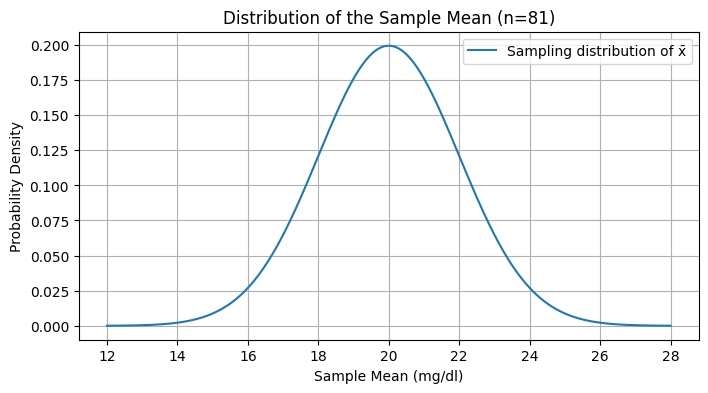

Z-score for sample mean 15.5: -2.25
Z-score for sample mean 23: 1.50
Probability of sample mean being between 175 and 185: 81.9%


In [24]:
# 1

n = 64
mu = 20
sigma = 16
# Sampling distribution parameters
sigma_xbar = sigma / np.sqrt(n)

# x-values for plotting
x = np.linspace(mu - 4*sigma_xbar, mu + 4*sigma_xbar, 500)
y = norm.pdf(x, mu, sigma_xbar)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Sampling distribution of x̄')
plt.title('Distribution of the Sample Mean (n=81)')
plt.xlabel('Sample Mean (mg/dl)')
plt.ylabel('Probability Density')
plt.grid(True)
plt.legend()
plt.show()

# 2. Calculate the z-score for overline{x_1} = 15.5
z1 = (15.5 - mu) / sigma_xbar
print(f"Z-score for sample mean 15.5: {z1:.2f}")

# 3. Calculate the z-score for overline{x_2} = 23
z2 = (23 - mu) / sigma_xbar
print(f"Z-score for sample mean 23: {z2:.2f}")

# 4:  prob 16 < x < 22
s = stats.norm.cdf(22, loc=mu, scale=sigma_xbar) - stats.norm.cdf(16, loc=mu, scale=sigma_xbar)
print(f"Probability of sample mean being between 175 and 185: {s * 100:.1f}%")


## Exercise 3

When students write in their bachelor thesis proposal that they want to conduct a survey, we usually try to dissuade them from doing so. With what you have learned about sampling and the central limit theorem, can you think of some reasons why we do this?

In [25]:
# ### 🔍 1. **Small sample sizes are unreliable**

# * The **CLT only applies reliably for large sample sizes** (commonly $n \geq 30$, but larger is better).
# * Bachelor students often collect small samples (e.g., 10–30 responses), which means:

#   * The sampling distribution of the mean or proportion may **not approximate normality**.
#   * Results are more likely to be **biased** or **unstable** due to random variation.

# ---

# ### 🧪 2. **Sampling bias and poor design**

# * Designing a **representative sample** requires understanding of:

#   * **Population definition**
#   * **Random sampling techniques**
#   * **Non-response bias** and **self-selection bias**
# * Bachelor students often survey friends, classmates, or online contacts, which leads to:

#   * **Convenience sampling**, not random sampling.
#   * **Invalid generalizations** from unrepresentative data.

# ---

# ### 📉 3. **Low statistical power**

# * Small or biased samples lead to **low power**, making it hard to detect meaningful effects.
# * Students may misinterpret **noise** as signal or fail to find patterns that actually exist.

# ---

# ### 🧠 4. **Overestimation of what a survey can prove**

# * Students often want to "prove" something with a survey.
# * But surveys, especially with poor sampling, rarely produce **robust, generalizable conclusions**.
# * They may end up using the survey data **anecdotally**, which weakens the scientific rigor.

# ---

# ### 🕐 5. **Time and skill constraints**

# * Proper survey design, piloting, distribution, collection, cleaning, and analysis take time.
# * Students underestimate the complexity and end up with **messy, unusable data**.
# * This leaves little time for thoughtful analysis or reflection in the thesis.

# ---

# ### ✅ Better alternatives for students:

# * **Secondary data analysis** (e.g. open datasets with good sample size).
# * **Experimental or quasi-experimental designs** with better control.
# * **Simulations** or **modeling** using known statistical properties.
# * **Qualitative methods** (e.g., interviews) if the research question allows it and fewer generalizations are needed.

# ---

# ### 📌 Summary

# > Surveys *can* be useful, but they are often **misused** or **poorly executed** by students.
# Without representative sampling and adequate sample size, results are hard to trust. 
# The CLT reminds us that **good inference needs good sampling** — and many bachelor projects simply can’t meet that bar.

